# **Develoyment of an AI application**

AI algorithms will be used in an increasing number of commonplace applications in the future. For instance, you might want to incorporate an image classifier into a mobile application. As part of the broader application design, you would employ a deep learning model that had been trained on hundreds of thousands of photos to accomplish this. 


The use of these kinds of models as standard components of applications will make up a sizable portion of software development in the future. You will train an image classifier in this project to identify several flower species. You could envision implementing something similar in a mobile application that identifies the flower your camera is now focused on. In actual use, you would train the classifier before exporting it for use in your program.We'll be using [this dataset](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) of 102 flower categories, you can see a few examples below.

"<img src='https://github.com/udacity/pytorch_challenge/blob/master/assets/Flowers.png?raw=1' width=500px>\n

The project is broken down into multiple steps:

1. Load and preprocess the image dataset
2. Train the image classifier on your dataset
3. Use the trained classifier to predict image content

We'll lead you through each part which you'll implement in Python.

You will have an app that can be trained on every set of labeled photos once you have finished this project. Your network will learn about flowers in this situation and become a command line program. However, how you use your new abilities depends on your creativity and the time you put into compiling a dataset. Consider an app that, when you take a photo of a car, identifies its make and model and searches the internet for information about it. Get out there and create your own dataset.

Importing the necessary packages should come first. Keeping all the imports at the start of your code is good practice. Make sure to include the import here as you go through the same notebook and discover that you'll need to import a package.







In [ ]:
!pip install wheel setuptools
!pip install pythonnet

In [ ]:
!pip install wheel==0.34.1
!pip install opencv-python

In [ ]:
! pip uninstall fastai -y
! pip install fastai


In [ ]:
!pip install light-the-torch
!ltt install torch torchvision
!pip install fastai --upgrade

In [ ]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

import torch

In [ ]:
# we will verify that GPU is enabled for this notebook
# following should print: CUDA is available!  Training on GPU ...
# 
# if it prints otherwise, then you need to enable GPU: 
# from Menu > Runtime > Change Runtime Type > Hardware Accelerator > GPU

import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

In [ ]:

!pip uninstall -y Pillow
# install the new one
!pip install Pillow
# import the new one
import PIL
print(PIL.PILLOW_VERSION)


In [ ]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py


In [ ]:
# This is the contents of helper.py 
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))
    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax
def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')  

#**Loading the Data**

Here you'll use torchvision to load the data ( [documentation](https://pytorch.org/docs/0.3.0/torchvision/index.html)). You can [download the data here](https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip).The dataset is divided into training and validation sections. You should use transformations for the training, such as random scaling, cropping, and flipping. This will aid network generalization and improve performance. The input data must be scaled to 224x224 pixels if you use a pre-trained network, as this is what the networks expect.

The model's performance on unprocessed data is evaluated using the validation set. You won't need to scale or rotate the photographs for this; instead, you'll need to resize and then crop the images to the right size.

The pre-trained networks offered by torchvision were developed using a distinct normalization for each color channel in the ImageNet dataset. You must adjust the averages and standard deviations of the picture data for both sets to match what the network anticipates. Calculated from the photos in ImageNet, the means are [0.485, 0.456, 0.406] and the standard deviations are [0.229, 0.224, 0.225]. These values, which range from -1 to 1, will adjust each color channel so that it is centered at 0.

In [ ]:
!pip install https://github.com/CellProfiling/HPA-Cell-Segmentation/archive/master.zip


In [ ]:
!git clone https://github.com/CellProfiling/HPA-Cell-Segmentation
!cd HPA-Cell-Segmentation; sh install.sh

In [ ]:
!pip install Pillow --upgrade

In [ ]:
# Imports here
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets , transforms , models

In [ ]:
# we will download the required data files
!wget -cq https://github.com/udacity/pytorch_challenge/raw/master/cat_to_name.json
!wget -cq https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip
!rm -r flower_data || true
!unzip -qq flower_data.zip

In [ ]:
data_dir = 'flower_data'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'

In [ ]:
# TODO: Define your transforms for the training and validation sets
train_transforms = transforms.Compose([transforms.RandomRotation(30),transforms.RandomResizedCrop(224),transforms.RandomHorizontalFlip(),transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

# TODO: Load the datasets with ImageFolder
train_data = datasets.ImageFolder(train_dir , transform=train_transforms)
test_data = datasets.ImageFolder(valid_dir, transform=test_transforms)



# TODO: Using the image datasets and the trainforms, define the dataloaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

## **Label mapping**

You'll also need to load in a mapping from category label to category name. You can find this in the file cat_to_name.json. It's a JSON object which you can read in with the json module. This will give you a dictionary mapping the integer encoded categories to the actual names of the flowers.You'll also need to load in a mapping from category label to category name. You can find this in the file cat_to_name.json. It's a JSON object which you can read in with the json [module](https://docs.python.org/2/library/json.html). This will give you a dictionary mapping the integer encoded categories to the actual names of the flowers.

In [ ]:
import json

with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

In [ ]:
#mounting the model to drive
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!ls /content/gdrive/'My Drive'

In [ ]:
model_save_name = 'classifier.pt'
path = F"/content/gdrive/My Drive/classifier.pt"

# Building and training the classifier
Now that the data is ready, it's time to build and train the classifier. As usual, you should use one of the pretrained models from torchvision.models to get the image features. Build and train a new feed-forward classifier using those features.

1. Load a pre-trained network (If you need a starting point, the VGG networks work great and are straightforward to use)
2. Define a new, untrained feed-forward network as a classifier, using ReLU activations and dropout
3. Train the classifier layers using backpropagation using the pre-trained network to get the features
4. Track the loss and accuracy on the validation set to determine the best hyperparameters

In [ ]:
from torch.optim import lr_scheduler
# TODO: Build and train your network

# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#using pre-trained resnet50 from imageNet database
model = models.resnet152(pretrained=True)

#handling parameters
for name,child in model.named_children():
  if name in ['layer3','layer4']:
    print(name + 'is unfrozen')
    for param in child.parameters():
      param.requires_grad = True
  else:
    print(name + 'is frozen')
    for param in child.parameters():
      param.requires_grad = False

#creating our own classifier with name fc (as defined in resnet50)
model.fc = nn.Sequential(nn.Linear(2048, 512),nn.ReLU(),nn.Linear(512,102),nn.LogSoftmax(dim=1))    

#using crossentropyloss
criterion = nn.NLLLoss()

#taking steps of gradient descent with lr =0.01 and only fc parameters ,Only train the classifier parameters, feature parameters are frozen

optimizer = torch.optim.Adam(filter(lambda p:p.requires_grad,model.parameters()) , lr = 0.001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1)


model.to(device);

In [ ]:
model.load_state_dict(torch.load(path))



In [ ]:

import numpy as np
#train the model
epochs = 20

#to have a history of losses to plot the graph
train_losses , test_losses = [] , []

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf #set initial "min" to infinity
#to put the model in training mode
model.train()
for epoch in range(epochs):
  running_loss = 0
  scheduler.step()
  for images , labels in trainloader:
    images, labels = images.to(device), labels.to(device)
    # clear the gradients of all optimized variables
    optimizer.zero_grad()
    #forward pass (feed forward)forward pass: compute predicted outputs by passing inputs to the model
    outputs = model(images)
    # calculate the loss
    loss = criterion(outputs,labels)
    #gradient descent ,backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()
    # perform a single optimization step (parameter update)
    optimizer.step()
    # update running training loss
    running_loss += loss.item()
  # initialize lists to monitor test loss and accuracy
  test_loss = 0
  accuracy = 0
  #we no longer gradients to be calculated
  with torch.no_grad():
    model.eval() # prep model for evaluation
    for images , labels in testloader:
      images, labels = images.to(device), labels.to(device)
      logps = model(images) # forward pass: compute predicted outputs by passing inputs to the model
      test_loss += criterion(logps,labels) #calculate the loss and update the loss
      ps = torch.exp(logps)
      top_p , top_class = ps.topk(1,dim=1)
      equals = top_class == labels.view(*top_class.shape)
      accuracy += torch.mean(equals.type(torch.FloatTensor))    
   
  train_losses.append(running_loss/len(trainloader))
  test_losses.append(test_loss/len(testloader))
  print("Epoch: {}/{}.. ".format(epoch+1, epochs),"Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),"Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
        "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
  model.train() 
  # save model if validation loss has decreased
  if test_loss/len(testloader) <= valid_loss_min:
        print('test loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,test_loss/len(testloader))) 
        torch.save(model.state_dict(), path)
        valid_loss_min = test_loss/len(testloader)  

# **Save the checkpoint**
network is trained,Now save the model so we can load it later for making predictions. 

In [ ]:
# TODO: Save the checkpoint 
model.class_to_idx = train_data.class_to_idx

# Inference for classification

Now  write a function to use a trained network for inference. That is, will pass an image into the network and predict the class of the flower in the image. Write a function called predict that takes an image and a model, then returns the top  most likely classes along with the probabilities. It should look like

probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
First  need to handle processing the input image such that it can be used in network.

# **Image Processing**

use PIL to load the image [document](https://pillow.readthedocs.io/en/latest/reference/Image.html)). It's best to write a function that preprocesses the image so it can be used as input for the model. This function should process the images in the same manner used for training.

First, resize the images where the shortest side is 256 pixels, keeping the aspect ratio. This can be done with the thumbnail or resize methods. Then need to crop out the center 224x224 portion of the image.

Color channels of images are typically encoded as integers 0-255, but the model expected floats 0-1.Need to convert the values. It's easiest with a Numpy array, which you can get from a PIL image like so np_image = np.array(pil_image).

As before, the network expects the images to be normalized in a specific way. For the means, it's [0.485, 0.456, 0.406] and for the standard deviations [0.229, 0.224, 0.225]. You'll want to subtract the means from each color channel, then divide by the standard deviation.

And finally, PyTorch expects the color channel to be the first dimension but it's the third dimension in the PIL image and Numpy array. You can reorder dimensions using ndarray.transpose. The color channel needs to be first and retain the order of the other two dimensions.

In [ ]:
from PIL import Image
image_path = 'flower_data/valid/28/image_05258.jpg'
img = Image.open(image_path)
def process_image(image_path):
    ''' 
    Scales, crops, and normalizes a PIL image for a PyTorch       
    model, returns an Numpy array
    '''
    # Open the image
    from PIL import Image
    img = Image.open(image_path)
    # Resize
    if img.size[0] > img.size[1]:
        img.thumbnail((10000, 256))
    else:
        img.thumbnail((256, 10000))
    # Crop 
    left_margin = (img.width-224)/2
    bottom_margin = (img.height-224)/2
    right_margin = left_margin + 224
    top_margin = bottom_margin + 224
    img = img.crop((left_margin, bottom_margin, right_margin,   
                      top_margin))
    # Normalize
    img = np.array(img)/255
    mean = np.array([0.485, 0.456, 0.406]) #provided mean
    std = np.array([0.229, 0.224, 0.225]) #provided std
    img = (img - mean)/std
    
    # Move color channels to first dimension as expected by PyTorch
    img = img.transpose((2, 0, 1))
    
    return img

To check your work, the function below converts a PyTorch tensor and displays it in the notebook. If your process_image function works, running the output through this function should return the original image (except for the cropped out portions).

In [ ]:
def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()
    if title:
        plt.title(title)
    # PyTorch tensors assume the color channel is first
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable
img = process_image(image_path)
print(type(img))
imshow(img)

# Class Prediction
Now get images in the correct format, it's time to write a function for making predictions with model. A common practice is to predict the top 5 or so (usually called top-) most probable classes. I want to calculate the class probabilities then find the  largest values.

To get the top  largest values in a tensor use x.topk(k). This method returns both the highest k probabilities and the indices of those probabilities corresponding to the classes. I need to convert from these indices to the actual class labels using class_to_idx which hopefully you added to the model or from an ImageFolder you used to load the data (see here). 

Again, this method should take a path to an image and a model checkpoint, then return the probabilities and classes.

probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']


# Sanity Checking

Now that I can use a trained model for predictions, check to make sure it makes sense. Even if the validation accuracy is high, it's always good to check that there aren't obvious bugs. Use matplotlib to plot the probabilities for the top 5 classes as a bar graph, along with the input image. It should look like this:

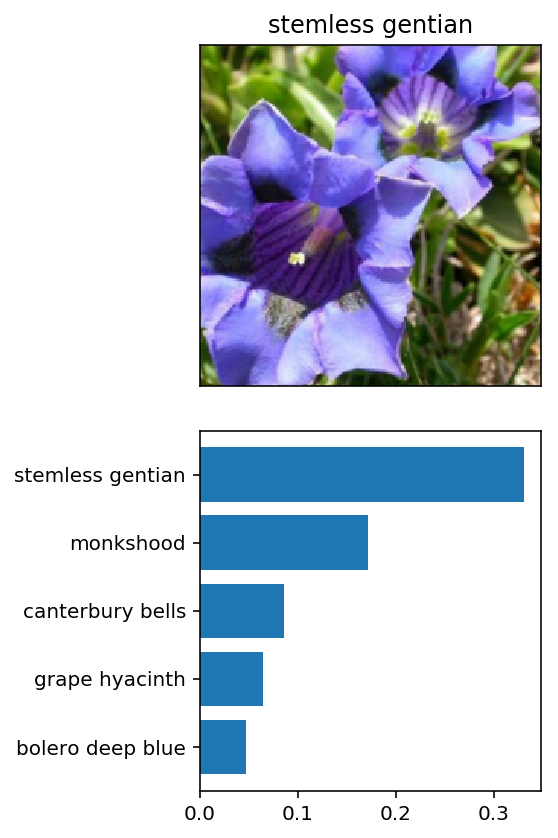

Now convert from the class integer encoding to actual flower names with the cat_to_name.json file. To show a PyTorch tensor as an image, use the imshow function defined above.

In [ ]:
def predict(image_path, model, top_k=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    
    image_path: string. Path to image, directly to image and not to folder.
    model: pytorch neural network.
    top_k: integer. The top K classes to be calculated
    
    returns top_probabilities(k), top_labels
    '''
    
    # No need for GPU on this part (just causes problems)
    model.to("cpu")
    
    # Set model to evaluate
    model.eval();

    # Convert image from numpy to torch
    torch_image = torch.from_numpy(np.expand_dims(process_image(image_path), 
                                                  axis=0)).type(torch.FloatTensor).to("cpu")

    # Find probabilities (results) by passing through the function (note the log softmax means that its on a log scale)
    log_probs = model.forward(torch_image)

    # Convert to linear scale
    linear_probs = torch.exp(log_probs)

    # Find the top 5 results
    top_probs, top_labels = linear_probs.topk(top_k)
    
    # Detatch all of the details
    top_probs = np.array(top_probs.detach())[0] # This is not the correct way to do it but the correct way isnt working thanks to cpu/gpu issues so I don't care.
    top_labels = np.array(top_labels.detach())[0]
    
    # Convert to classes
    idx_to_class = {val: key for key, val in    
                                      model.class_to_idx.items()}
    top_labels = [idx_to_class[lab] for lab in top_labels]
    top_flowers = [cat_to_name[lab] for lab in top_labels]
    
    return top_probs, top_labels, top_flowers

In [ ]:
import seaborn as sns
# TODO: Display an image along with the top 5 classes
# Define image path
image_path = "flower_data/valid/89/image_00640.jpg"

# Set up plot
plt.figure(figsize = (6,10))
ax = plt.subplot(2,1,1)

# Set up title
flower_num = image_path.split('/')[2]
title_ = cat_to_name[flower_num]

# Plot flower
img = process_image(image_path)
imshow(img, ax, title = title_);

# Make prediction
probs, labs, flowers = predict(image_path, model) 

# Plot bar chart
plt.subplot(2,1,2)
sns.barplot(x=probs, y=flowers, color=sns.color_palette()[0]);
plt.show()


# THIS IS MODIFIED FROM NOW ONWARDS

In [ ]:
print(cat_to_name)
